In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


# Import dataset file 

In [149]:
data=pd.read_csv('/home/tamizh3110/Downloads/cost-of-living.csv',header=0)

In [150]:
data.rename(columns={'Unnamed: 0':'Features/Countries'},inplace=True)
data.head(55)

,Features/Countries,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [151]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 161 entries, Features/Countries to Quito, Ecuador
dtypes: float64(160), object(1)
memory usage: 69.3+ KB
None


Drop columns with nan values

In [152]:
# drop columns with nan values
data.dropna()

,Features/Countries,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In our dataset we can notice that with respect to countries we seem to find correlation between each of them

In [153]:
data.corr(method='pearson')

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Saint Petersburg, Russia",1.000000,0.994591,0.992885,0.974678,0.994256,0.978407,0.986334,0.989404,0.994240,0.995817,...,0.992920,0.993897,0.992960,0.931602,0.989569,0.918586,0.950830,0.907843,0.987507,0.995093
"Istanbul, Turkey",0.994591,1.000000,0.998096,0.952730,0.989128,0.964077,0.991457,0.984674,0.985827,0.994348,...,0.990246,0.989795,0.995722,0.929162,0.976233,0.906851,0.946219,0.890543,0.986314,0.987005
"Izmir, Turkey",0.992885,0.998096,1.000000,0.957592,0.993289,0.952577,0.997541,0.991896,0.982589,0.997639,...,0.995497,0.994748,0.999179,0.905866,0.980290,0.882891,0.926335,0.867759,0.993682,0.986317
"Helsinki, Finland",0.974678,0.952730,0.957592,1.000000,0.972899,0.962191,0.959737,0.978581,0.960472,0.972428,...,0.972737,0.975903,0.961572,0.861826,0.995373,0.880925,0.902077,0.890961,0.967460,0.965490
"Chisinau, Moldova",0.994256,0.989128,0.993289,0.972899,1.000000,0.953016,0.992496,0.997321,0.990848,0.998019,...,0.999128,0.999303,0.996688,0.895879,0.988682,0.872939,0.914602,0.859678,0.997705,0.995356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",0.918586,0.906851,0.882891,0.880925,0.872939,0.971561,0.853151,0.855945,0.913964,0.882666,...,0.865918,0.870543,0.873427,0.980660,0.888768,1.000000,0.992545,0.993922,0.845885,0.900548
"Perth, Australia",0.950830,0.946219,0.926335,0.902077,0.914602,0.981194,0.900232,0.897968,0.947804,0.923061,...,0.909050,0.912024,0.918198,0.991161,0.917133,0.992545,1.000000,0.979461,0.892862,0.937106
"Sydney, Australia",0.907843,0.890543,0.867759,0.890961,0.859678,0.971359,0.840817,0.847781,0.895982,0.870922,...,0.854349,0.859884,0.858101,0.955988,0.890584,0.993922,0.979461,1.000000,0.833124,0.883338
"Alexandria, Egypt",0.987507,0.986314,0.993682,0.967460,0.997705,0.936092,0.996751,0.998630,0.980236,0.996993,...,0.999164,0.998584,0.997150,0.870473,0.985194,0.845885,0.892862,0.833124,1.000000,0.987073


We would like to consider the countries as our rows and the columns as our features which can explain the cost. Therefore we transpose our entire data

In [154]:
country_data=data.T

In [155]:
country_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Features/Countries,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [156]:
new_header=country_data.iloc[0]
country_data=country_data[1:]
country_data.columns=new_header

In [157]:
country_data.head(5)

Features/Countries,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


# Understanding statistics of our data

Now let us just consider rent for 1 bedroom apartment in city centre and average monthly net salary(after tax) to understand how much of an expense is impacted by rent

In [158]:
country_data=country_data[['Apartment (1 bedroom) in City Centre','Average Monthly Net Salary (After Tax)']]

In [159]:
country_data

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"Saint Petersburg, Russia",524.45,645.94
"Istanbul, Turkey",291.55,436
"Izmir, Turkey",212.22,392.07
"Helsinki, Finland",986.93,2382.56
"Chisinau, Moldova",244.49,286.95
...,...,...
"Melbourne, Australia",1134.86,2791.96
"Perth, Australia",897.5,2493.77
"Sydney, Australia",1568.39,3018.36
"Alexandria, Egypt",142.04,163.94


In [160]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 2 columns):
Apartment (1 bedroom) in City Centre      160 non-null object
Average Monthly Net Salary (After Tax)    160 non-null object
dtypes: object(2)
memory usage: 3.8+ KB


In [161]:
country_data['Apartment (1 bedroom) in City Centre']=country_data['Apartment (1 bedroom) in City Centre'].astype('float64')
country_data['Average Monthly Net Salary (After Tax)']=country_data['Average Monthly Net Salary (After Tax)'].astype('float64')
country_data.describe()

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
count,160.000000,160.000000
mean,733.811250,1447.181938
std,549.634877,1257.350539
min,138.310000,163.940000
25%,330.952500,472.912500
50%,521.000000,859.610000
75%,988.742500,2373.027500
max,3131.060000,6532.210000


Now from the distribution we can clearly understand that the data is skewed to the right which can indicate that the mean is greater than the median of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d040a850>,
      dtype=object)

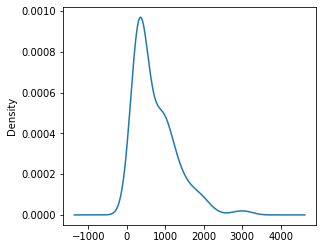

In [162]:
country_data['Apartment (1 bedroom) in City Centre'].plot(kind='density', subplots=True, layout=(1, 2),sharex=False,figsize=(10,4))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d027b0d0>,
      dtype=object)

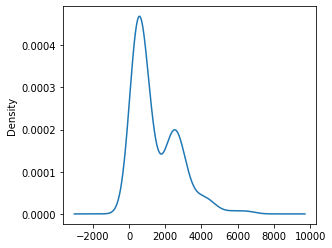

In [163]:
country_data['Average Monthly Net Salary (After Tax)'].plot(kind='density', subplots=True, layout=(1, 2),sharex=False,figsize=(10,4))

The box plots also indicate heavy outliers within the 1 bedroom rental data

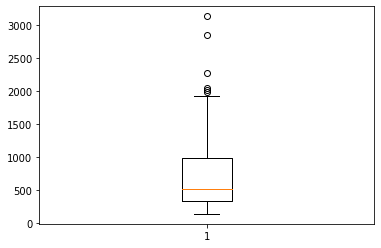

In [164]:
box_plot_apt=plt.boxplot(np.array((country_data['Apartment (1 bedroom) in City Centre'].values)))

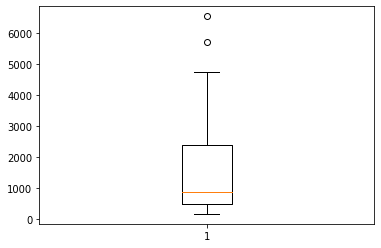

In [165]:
box_plot_sal=plt.boxplot(np.array((country_data['Average Monthly Net Salary (After Tax)'].values)))

Let us sort the data based on the average monthy salary to understand who has the highest salary income

In [166]:
country_data.sort_values(by='Average Monthly Net Salary (After Tax)',ascending=False)[0:20]

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"San Francisco, CA, United States",3131.06,6532.21
"Zurich, Switzerland",1701.77,5714.80
"Seattle, WA, United States",1919.17,4741.65
"New York, NY, United States",2854.26,4665.46
"San Diego, CA, United States",1816.10,4293.13
"Dallas, TX, United States",1322.45,4202.00
"Boston, MA, United States",2275.95,4132.08
"Austin, TX, United States",1581.66,4097.92
"Los Angeles, CA, United States",1980.11,3968.48
"Chicago, IL, United States",1702.25,3717.02


Let us sort the data based on the apartment 1 bedroom rent in city centre to understand who has highest single bedroom rent(in city center)

In [167]:
country_data.sort_values(by='Apartment (1 bedroom) in City Centre',ascending=False)[0:20]

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"San Francisco, CA, United States",3131.06,6532.21
"New York, NY, United States",2854.26,4665.46
"Boston, MA, United States",2275.95,4132.08
"Hong Kong, Hong Kong",2041.88,2387.66
"London, United Kingdom",2015.24,2756.93
"Los Angeles, CA, United States",1980.11,3968.48
"Seattle, WA, United States",1919.17,4741.65
"Singapore, Singapore",1859.98,2988.12
"San Diego, CA, United States",1816.10,4293.13
"Chicago, IL, United States",1702.25,3717.02


Based on the above information let us take the difference between net salary and rental cost sort them based on net gain/loss after rental costs

In [168]:
country_data['Net Salary after rent expenses']=np.array(country_data['Average Monthly Net Salary (After Tax)'].values)-np.array(country_data['Apartment (1 bedroom) in City Centre'].values)

In [169]:
country_data.sort_values(by=['Net Salary after rent expenses'],ascending=False)[0:20]

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax),Net Salary after rent expenses
"Zurich, Switzerland",1701.77,5714.80,4013.03
"San Francisco, CA, United States",3131.06,6532.21,3401.15
"Dallas, TX, United States",1322.45,4202.00,2879.55
"Seattle, WA, United States",1919.17,4741.65,2822.48
"Austin, TX, United States",1581.66,4097.92,2516.26
"San Diego, CA, United States",1816.10,4293.13,2477.03
"Houston, TX, United States",1258.81,3568.78,2309.97
"Las Vegas, NV, United States",992.86,3132.38,2139.52
"Calgary, Canada",833.74,2956.33,2122.59
"Phoenix, AZ, United States",1092.25,3113.47,2021.22


# Clear trend

We can clearly notice a new trend as Zurich, Switzerland takes the top spot in net gain after rental costs. Even though this does not consider currency conversion into aspects, in magnitude perspective we seem to find our new outlier takes the first rank spot.

In [170]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 3 columns):
Apartment (1 bedroom) in City Centre      160 non-null float64
Average Monthly Net Salary (After Tax)    160 non-null float64
Net Salary after rent expenses            160 non-null float64
dtypes: float64(3)
memory usage: 5.0+ KB


In [171]:
country_data['Net Salary after rent expenses'].describe()

count     160.000000
mean      713.370688
std       790.499620
min      -194.310000
25%       143.640000
50%       351.500000
75%      1229.287500
max      4013.030000
Name: Net Salary after rent expenses, dtype: float64

In [172]:
country_data.corr(method='pearson')

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax),Net Salary after rent expenses
Features/Countries,,,
Apartment (1 bedroom) in City Centre,1.000000,0.910265,0.752547
Average Monthly Net Salary (After Tax),0.910265,1.000000,0.957669
Net Salary after rent expenses,0.752547,0.957669,1.000000


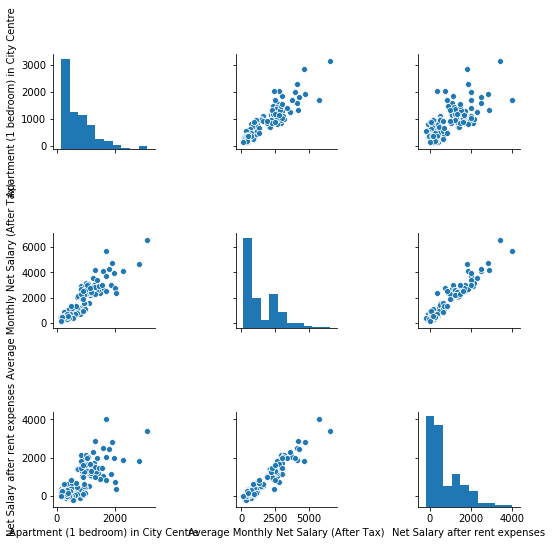

In [173]:
%config InlineBackend.figure_format = 'png'

sns.pairplot(country_data)

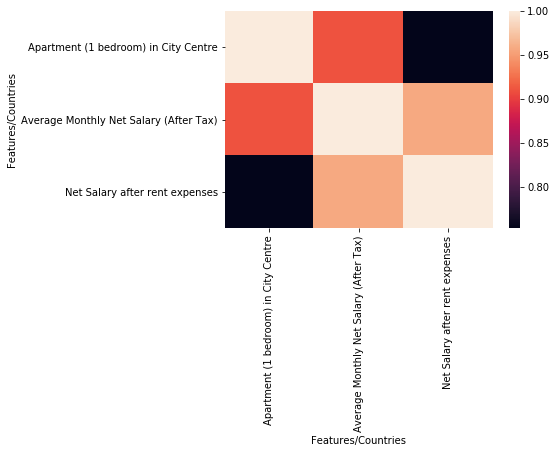

In [174]:
corr_matrix=country_data.corr()
sns.heatmap(corr_matrix)

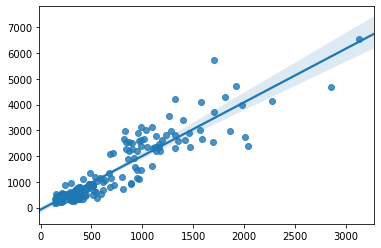

In [175]:
model=sns.regplot(country_data['Apartment (1 bedroom) in City Centre'].values,country_data['Average Monthly Net Salary (After Tax)'].values)


# Matthew - code

In [1]:
import pandas as pd
import csv
import urllib.request as ur

In [2]:
data = pd.read_csv('cost-of-living.csv')
data.shape, data.columns

((55, 161),
 Index(['Unnamed: 0', 'Saint Petersburg, Russia', 'Istanbul, Turkey',
        'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova',
        'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
        'Baku, Azerbaijan',
        ...
        'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
        'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
        'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
        'Quito, Ecuador'],
       dtype='object', length=161))

In [3]:
# changing the 1st column name from "unnamed 0:" to "respective_costs"
cols = data.columns.values
cols[0] = 'respective_costs'
data.columns = cols
data.columns

Index(['respective_costs', 'Saint Petersburg, Russia', 'Istanbul, Turkey',
       'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova',
       'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
       'Baku, Azerbaijan',
       ...
       'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
       'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
       'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
       'Quito, Ecuador'],
      dtype='object', length=161)

In [4]:
# transposing the data to get features as columns
tpose = data.transpose()
tpose.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [5]:
# converting column names from numbers to values in the first row and then delete the first row
tcols = tpose.iloc[0, :]
tpose.columns = tcols

feature_data = tpose.drop(['respective_costs'], axis=0)
feature_data.head()

respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


The dataset has been transposed and each of the columns are now the factors measured and each of the rows are not the respective countries. The dataframe header has also been reset.

In [6]:
# using the data - AFTER TRANSPOSE
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

print("In bytes: ", os.path.getsize("cost-of-living.csv"), "bytes")
print("In kilo-bytes: ", os.path.getsize("cost-of-living.csv") / 1000, "KB")

In bytes:  54993 bytes
In kilo-bytes:  54.993 KB


In [7]:
feature_data.columns

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
      

Displaying a scatter and distance plots of each feature in the data by plots


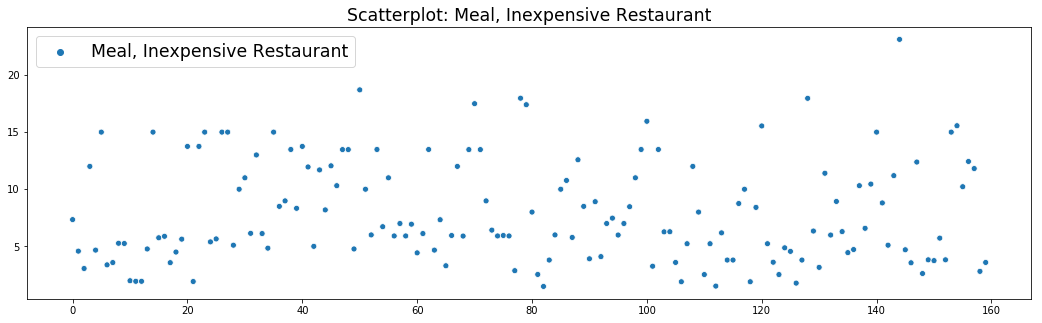

Distance Plot  0 :  Meal, Inexpensive Restaurant


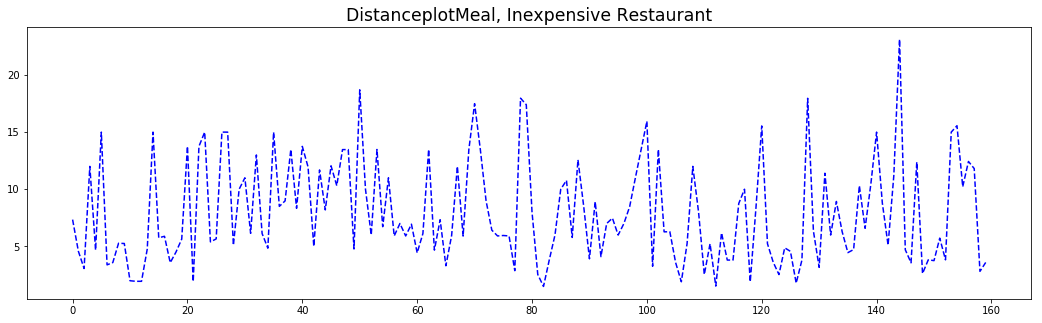

*******************************************************



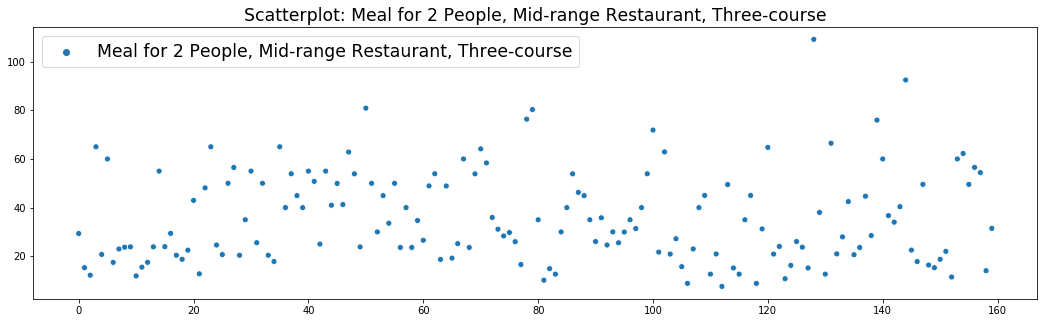

Distance Plot  1 :  Meal for 2 People, Mid-range Restaurant, Three-course


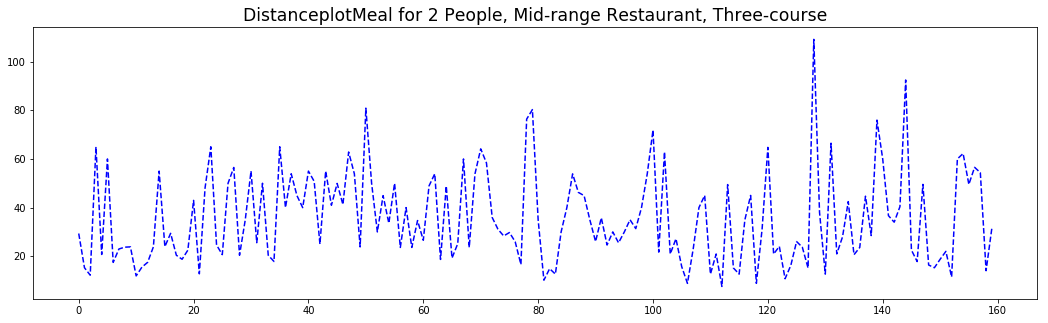

*******************************************************



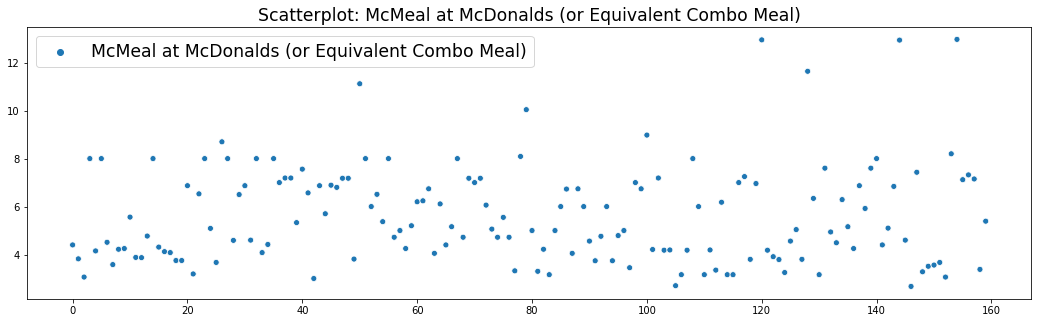

Distance Plot  2 :  McMeal at McDonalds (or Equivalent Combo Meal)


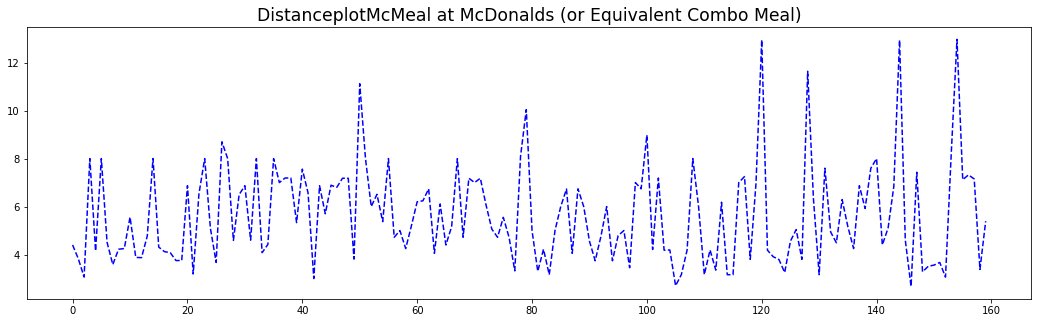

*******************************************************



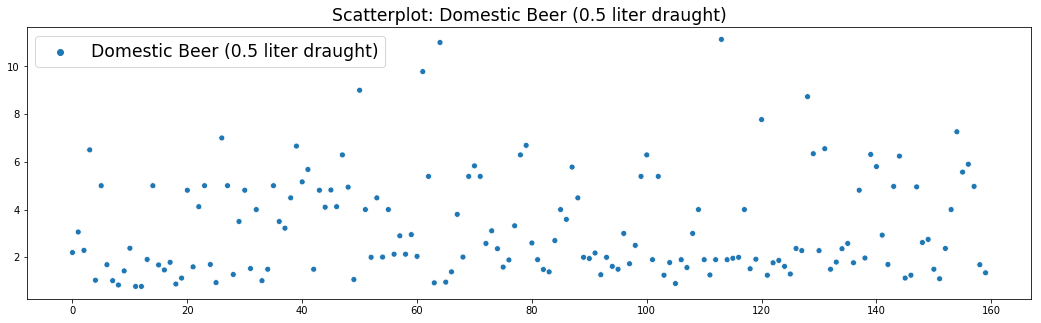

Distance Plot  3 :  Domestic Beer (0.5 liter draught)


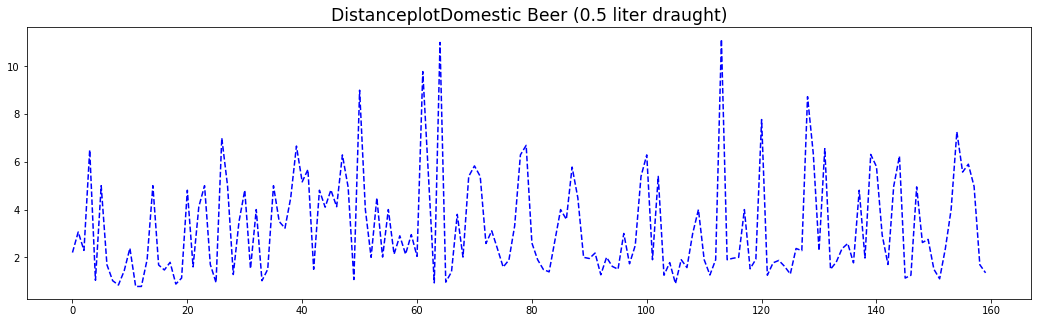

*******************************************************



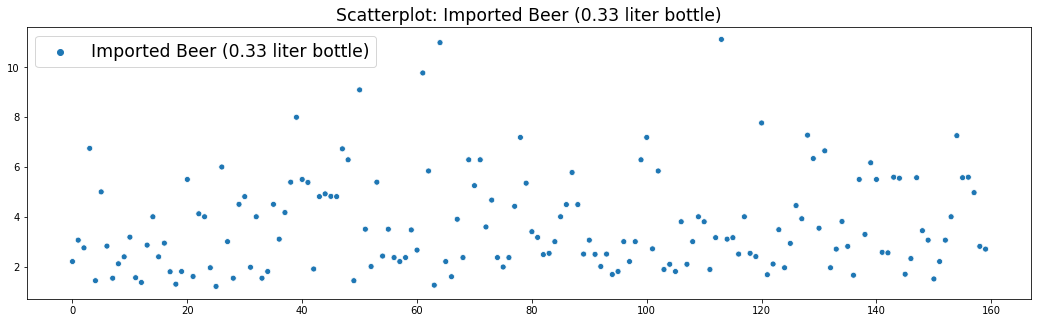

Distance Plot  4 :  Imported Beer (0.33 liter bottle)


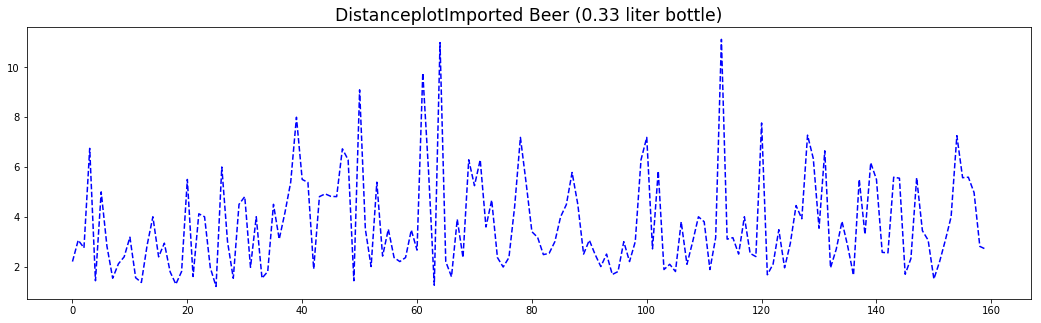

*******************************************************



In [8]:
# examining each features by plotting them
# get all the columns
all_cols = feature_data.columns.values
print("Displaying a scatter and distance plots of each feature in the data by plots")

# iterate over the first 5 features of the data
for i in range(5):
    
    # convert each feature to array and form a new dataframe to remove the index
    to_arr = np.array(feature_data.iloc[:, i])
    cur_feature = pd.DataFrame({all_cols[i]: to_arr})
    
    # apply a scatter plot over the feature
    plt.figure(figsize=(18,5))
    sns.scatterplot(data=cur_feature)
    plt.legend(fontsize='xx-large')
    feature_title = 'Scatterplot: ' + all_cols[i]
    plt.title(feature_title, fontsize='xx-large')
    plt.show()
    
    # apply a distance plot over the feature
    print("Distance Plot ", i, ": ", all_cols[i])
    plt.figure(figsize=(18,5))
    plt.plot(cur_feature.index, cur_feature, 'b--')
    feature_title = 'Distanceplot' + all_cols[i]
    plt.title(feature_title, fontsize='xx-large')
    plt.show()
    
    print("*******************************************************\n")

The above graphs show the scatter plot of the first 10 features followed by their line plot to show the trends and distribution of the data. The conclusion is that there is no exact distribution of each feature, so for now it would be of no use to observe the features.

In [9]:
# basic statistical summary

print("Summary statistics:\n")

# examining the statistics of the first 5 features
for i in range(5):
    print("Statistics of - ", all_cols[i])
    to_arr = np.array(feature_data.iloc[:, i])
    medi = median(to_arr)
    print("Median: ", medi)
    
    print(feature_data.iloc[:, i].describe(), "\n")
    
    # Standard Deviation
    std = sqrt(np.var(to_arr))
    print("Standard deviation: ", std)
    
    print('The first four calculated moments of a normal distribution: ')
    # Mean
    mean = to_arr.mean()
    print('Mean: ', mean)

    # Variance
    var = np.var(to_arr)
    print('Variance: ', var)

    # Return unbiased skew normalized by N-1
    skew = feature_data[all_cols[i]].skew()
    print('Skewness: ', skew)

    # Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis 
    # (kurtosis of normal == 0.0) normalized by N-1
    kurt = feature_data[all_cols[i]].kurtosis()
    print('Kurtosis: ', kurt)
    print("************************************************\n\n")

Summary statistics:

Statistics of -  Meal, Inexpensive Restaurant
Median:  6.285
count     160.0
unique    111.0
top        15.0
freq        8.0
Name: Meal, Inexpensive Restaurant, dtype: float64 

Standard deviation:  4.460580703769831
The first four calculated moments of a normal distribution: 
Mean:  7.967187499999997
Variance:  19.89678021484376
Skewness:  0.7268710944948107
Kurtosis:  -0.1904085576868053
************************************************


Statistics of -  Meal for 2 People, Mid-range Restaurant, Three-course
Median:  30.555
count     160.0
unique    116.0
top        40.0
freq        5.0
Name: Meal for 2 People, Mid-range Restaurant, Three-course, dtype: float64 

Standard deviation:  18.819565400385176
The first four calculated moments of a normal distribution: 
Mean:  35.76862499999998
Variance:  354.1760418593749
Skewness:  0.8790284278947901
Kurtosis:  0.6898308655170591
************************************************


Statistics of -  McMeal at McDonalds (or

Examining the statistics of each feature to understand if specific features can be used for specific results.

In [10]:
# difference noted between describe function of the original data and the transposed data
feature_data = feature_data.astype('float')
feature_data.describe()

respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.967187,35.768625,5.634250,3.257625,3.702937,1.261188,0.935125,0.998937,1.197875,1.902813,...,0.995187,2.391625,1.583187,1.809750,1.355938,1.076563,9.599437,20497.003688,447.470187,8039.567875
std,4.474586,18.878654,2.036808,2.140890,1.949165,0.723930,0.627407,0.391720,0.760670,0.752520,...,0.484362,0.994821,0.964584,1.080635,0.481411,0.648750,4.964241,6037.691697,421.356658,5972.758905
min,1.490000,7.590000,2.670000,0.780000,1.200000,0.290000,0.140000,0.390000,0.100000,0.750000,...,0.200000,0.670000,0.520000,0.350000,0.480000,0.250000,4.150000,11163.690000,37.060000,788.020000
25%,4.647500,20.925000,4.110000,1.665000,2.200000,0.647500,0.385000,0.710000,0.555000,1.377500,...,0.610000,1.537500,0.930000,1.050000,1.057500,0.547500,6.747500,17439.037500,176.375000,3666.565000
50%,6.285000,30.555000,5.095000,2.365000,3.080000,1.140000,0.810000,0.895000,1.020000,1.850000,...,0.910000,2.145000,1.225000,1.495000,1.250000,0.920000,8.690000,18868.595000,281.015000,6460.615000
75%,11.472500,49.637500,7.000000,4.812500,4.845000,1.750000,1.375000,1.170000,1.690000,2.352500,...,1.270000,3.132500,1.905000,2.455000,1.662500,1.420000,11.195000,21409.800000,572.902500,10511.532500
max,23.120000,109.160000,12.970000,11.130000,11.130000,3.870000,3.210000,2.640000,3.330000,5.330000,...,2.580000,5.210000,5.700000,5.760000,3.500000,3.400000,46.090000,67345.100000,2194.640000,34441.930000


In [11]:
feature_data.corr()

respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
respective_costs,,,,,,,,,,,,,,,,,,,,,
"Meal, Inexpensive Restaurant",1.000000,0.920283,0.879086,0.715290,0.611349,0.857994,0.851898,0.216713,0.766239,0.805795,...,0.714468,0.670967,0.661068,0.738921,0.568898,0.635462,0.656815,0.099815,0.762257,0.620160
"Meal for 2 People, Mid-range Restaurant, Three-course",0.920283,1.000000,0.893975,0.812823,0.715333,0.834237,0.828917,0.331572,0.813498,0.852472,...,0.778021,0.776176,0.668756,0.753682,0.606675,0.643318,0.686807,0.135740,0.700149,0.609628
McMeal at McDonalds (or Equivalent Combo Meal),0.879086,0.893975,1.000000,0.741438,0.650609,0.835094,0.821316,0.268769,0.727555,0.816253,...,0.676290,0.666189,0.548057,0.616062,0.579723,0.550347,0.691502,0.230600,0.615557,0.506310
Domestic Beer (0.5 liter draught),0.715290,0.812823,0.741438,1.000000,0.954140,0.614633,0.587440,0.398290,0.676835,0.736913,...,0.716188,0.817679,0.571309,0.590056,0.580697,0.529836,0.573682,0.221100,0.574692,0.503970
Imported Beer (0.33 liter bottle),0.611349,0.715333,0.650609,0.954140,1.000000,0.485235,0.460643,0.410855,0.679609,0.643795,...,0.682025,0.815722,0.584191,0.554158,0.511290,0.542485,0.513329,0.229102,0.528059,0.514749
Coke/Pepsi (0.33 liter bottle),0.857994,0.834237,0.835094,0.614633,0.485235,1.000000,0.966649,0.139515,0.682941,0.783246,...,0.650091,0.558542,0.527454,0.671948,0.612900,0.562815,0.675438,0.119491,0.592859,0.508992
Water (0.33 liter bottle),0.851898,0.828917,0.821316,0.587440,0.460643,0.966649,1.000000,0.132269,0.695807,0.751903,...,0.663523,0.560567,0.532818,0.689751,0.567233,0.583662,0.637250,0.086426,0.619589,0.522430
"Milk (regular), (1 liter)",0.216713,0.331572,0.268769,0.398290,0.410855,0.139515,0.132269,1.000000,0.382873,0.476357,...,0.483555,0.506297,0.284905,0.335891,0.433435,0.427499,0.500984,0.207165,0.219912,0.374115
Loaf of Fresh White Bread (500g),0.766239,0.813498,0.727555,0.676835,0.679609,0.682941,0.695807,0.382873,1.000000,0.760644,...,0.804035,0.785982,0.805228,0.836158,0.547846,0.835554,0.649380,0.061186,0.667803,0.722826


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 161 entries, respective_costs to Quito, Ecuador
dtypes: float64(160), object(1)
memory usage: 69.3+ KB


In [13]:
data.describe()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,947.569636,1030.352000,973.539818,1235.551636,726.469091,1400.266909,939.282727,712.967455,800.866182,717.254182,...,876.614545,793.913091,921.488182,1344.416364,1703.642545,1173.578182,1059.191273,1256.769818,928.888000,1067.515636
std,3689.965894,4357.787422,4320.550584,4477.879943,3173.541506,4600.941958,4371.550743,3146.635068,3295.012186,3038.846698,...,3873.193779,3427.781972,4158.043792,4608.688084,6586.478694,3435.494486,3334.744925,3493.282897,4406.118669,4490.334519
min,0.030000,0.110000,0.090000,0.070000,0.070000,0.180000,0.010000,0.100000,0.030000,0.060000,...,0.030000,0.030000,0.120000,0.230000,0.130000,0.120000,0.320000,0.380000,0.010000,0.110000
25%,0.950000,0.855000,0.750000,2.180000,0.955000,1.995000,0.580000,0.930000,0.830000,1.025000,...,1.075000,0.975000,0.810000,2.070000,1.900000,2.400000,2.275000,2.430000,0.585000,1.330000
50%,4.400000,3.820000,3.060000,8.000000,3.610000,8.000000,3.380000,3.580000,3.540000,4.250000,...,3.600000,4.400000,3.060000,8.200000,10.370000,7.120000,7.320000,7.680000,3.380000,5.390000
75%,73.370000,43.365000,37.700000,82.575000,71.395000,86.485000,43.350000,68.605000,43.120000,35.250000,...,72.720000,73.910000,38.110000,75.620000,92.750000,79.930000,80.330000,90.720000,36.410000,49.155000
max,19305.290000,24443.150000,24443.150000,24402.770000,17238.130000,23233.330000,25098.600000,16859.680000,18564.590000,16535.220000,...,20706.610000,18196.160000,22948.670000,21788.330000,34921.490000,15479.870000,16149.980000,15845.500000,23626.730000,25324.920000


In [14]:
data.corr()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Saint Petersburg, Russia",1.000000,0.994591,0.992885,0.974678,0.994256,0.978407,0.986334,0.989404,0.994240,0.995817,...,0.992920,0.993897,0.992960,0.931602,0.989569,0.918586,0.950830,0.907843,0.987507,0.995093
"Istanbul, Turkey",0.994591,1.000000,0.998096,0.952730,0.989128,0.964077,0.991457,0.984674,0.985827,0.994348,...,0.990246,0.989795,0.995722,0.929162,0.976233,0.906851,0.946219,0.890543,0.986314,0.987005
"Izmir, Turkey",0.992885,0.998096,1.000000,0.957592,0.993289,0.952577,0.997541,0.991896,0.982589,0.997639,...,0.995497,0.994748,0.999179,0.905866,0.980290,0.882891,0.926335,0.867759,0.993682,0.986317
"Helsinki, Finland",0.974678,0.952730,0.957592,1.000000,0.972899,0.962191,0.959737,0.978581,0.960472,0.972428,...,0.972737,0.975903,0.961572,0.861826,0.995373,0.880925,0.902077,0.890961,0.967460,0.965490
"Chisinau, Moldova",0.994256,0.989128,0.993289,0.972899,1.000000,0.953016,0.992496,0.997321,0.990848,0.998019,...,0.999128,0.999303,0.996688,0.895879,0.988682,0.872939,0.914602,0.859678,0.997705,0.995356
"Milan, Italy",0.978407,0.964077,0.952577,0.962191,0.953016,1.000000,0.936639,0.944571,0.971223,0.957245,...,0.949135,0.952483,0.948853,0.959851,0.967628,0.971561,0.981194,0.971359,0.936092,0.965330
"Cairo, Egypt",0.986334,0.991457,0.997541,0.959737,0.992496,0.936639,1.000000,0.995232,0.972868,0.996589,...,0.996401,0.995348,0.998057,0.874536,0.981084,0.853151,0.900232,0.840817,0.996751,0.979425
"Banja Luka, Bosnia And Herzegovina",0.989404,0.984674,0.991896,0.978581,0.997321,0.944571,0.995232,1.000000,0.979462,0.997316,...,0.998874,0.999018,0.995273,0.870733,0.992269,0.855945,0.897968,0.847781,0.998630,0.986321
"Baku, Azerbaijan",0.994240,0.985827,0.982589,0.960472,0.990848,0.971223,0.972868,0.979462,1.000000,0.986898,...,0.985568,0.986568,0.984873,0.940938,0.976532,0.913964,0.947804,0.895982,0.980236,0.999086
"Guadalajara, Mexico",0.995817,0.994348,0.997639,0.972428,0.998019,0.957245,0.996589,0.997316,0.986898,1.000000,...,0.999055,0.999112,0.998872,0.900319,0.989615,0.882666,0.923061,0.870922,0.996993,0.991341


In [15]:
feature_data.dtypes

respective_costs
Meal, Inexpensive Restaurant                                                  float64
Meal for 2 People, Mid-range Restaurant, Three-course                         float64
McMeal at McDonalds (or Equivalent Combo Meal)                                float64
Domestic Beer (0.5 liter draught)                                             float64
Imported Beer (0.33 liter bottle)                                             float64
Coke/Pepsi (0.33 liter bottle)                                                float64
Water (0.33 liter bottle)                                                     float64
Milk (regular), (1 liter)                                                     float64
Loaf of Fresh White Bread (500g)                                              float64
Eggs (regular) (12)                                                           float64
Local Cheese (1kg)                                                            float64
Water (1.5 liter bottle)             

In [16]:
data.dtypes

respective_costs                       object
Saint Petersburg, Russia              float64
Istanbul, Turkey                      float64
Izmir, Turkey                         float64
Helsinki, Finland                     float64
Chisinau, Moldova                     float64
Milan, Italy                          float64
Cairo, Egypt                          float64
Banja Luka, Bosnia And Herzegovina    float64
Baku, Azerbaijan                      float64
Guadalajara, Mexico                   float64
Kathmandu, Nepal                      float64
Hanoi, Vietnam                        float64
Ho Chi Minh City, Vietnam             float64
Mexico City, Mexico                   float64
Rome, Italy                           float64
Monterrey, Mexico                     float64
Yekaterinburg, Russia                 float64
Sarajevo, Bosnia And Herzegovina      float64
Kharkiv, Ukraine                      float64
Kiev, Ukraine                         float64
Calgary, Canada                   

In [22]:
# converting features_data to float datatype
feature_float = feature_data.astype("float")
feature_float.corr()

respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
respective_costs,,,,,,,,,,,,,,,,,,,,,
"Meal, Inexpensive Restaurant",1.000000,0.920283,0.879086,0.715290,0.611349,0.857994,0.851898,0.216713,0.766239,0.805795,...,0.714468,0.670967,0.661068,0.738921,0.568898,0.635462,0.656815,0.099815,0.762257,0.620160
"Meal for 2 People, Mid-range Restaurant, Three-course",0.920283,1.000000,0.893975,0.812823,0.715333,0.834237,0.828917,0.331572,0.813498,0.852472,...,0.778021,0.776176,0.668756,0.753682,0.606675,0.643318,0.686807,0.135740,0.700149,0.609628
McMeal at McDonalds (or Equivalent Combo Meal),0.879086,0.893975,1.000000,0.741438,0.650609,0.835094,0.821316,0.268769,0.727555,0.816253,...,0.676290,0.666189,0.548057,0.616062,0.579723,0.550347,0.691502,0.230600,0.615557,0.506310
Domestic Beer (0.5 liter draught),0.715290,0.812823,0.741438,1.000000,0.954140,0.614633,0.587440,0.398290,0.676835,0.736913,...,0.716188,0.817679,0.571309,0.590056,0.580697,0.529836,0.573682,0.221100,0.574692,0.503970
Imported Beer (0.33 liter bottle),0.611349,0.715333,0.650609,0.954140,1.000000,0.485235,0.460643,0.410855,0.679609,0.643795,...,0.682025,0.815722,0.584191,0.554158,0.511290,0.542485,0.513329,0.229102,0.528059,0.514749
Coke/Pepsi (0.33 liter bottle),0.857994,0.834237,0.835094,0.614633,0.485235,1.000000,0.966649,0.139515,0.682941,0.783246,...,0.650091,0.558542,0.527454,0.671948,0.612900,0.562815,0.675438,0.119491,0.592859,0.508992
Water (0.33 liter bottle),0.851898,0.828917,0.821316,0.587440,0.460643,0.966649,1.000000,0.132269,0.695807,0.751903,...,0.663523,0.560567,0.532818,0.689751,0.567233,0.583662,0.637250,0.086426,0.619589,0.522430
"Milk (regular), (1 liter)",0.216713,0.331572,0.268769,0.398290,0.410855,0.139515,0.132269,1.000000,0.382873,0.476357,...,0.483555,0.506297,0.284905,0.335891,0.433435,0.427499,0.500984,0.207165,0.219912,0.374115
Loaf of Fresh White Bread (500g),0.766239,0.813498,0.727555,0.676835,0.679609,0.682941,0.695807,0.382873,1.000000,0.760644,...,0.804035,0.785982,0.805228,0.836158,0.547846,0.835554,0.649380,0.061186,0.667803,0.722826


In [23]:
# looking for important features
# applying univariate solutions using chi^2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# condition: choose an expected output to apply 'SelectKBest'
for i in range(10):
    X = feature_float.drop(feature_float.columns[i], axis=1)
    y = feature_float.iloc[:, i]
    
    # applying selectkbest
    
    #!! PROBLEM HERE !!
    selectk = SelectKBest(score_func=chi2, k=10)
    fit = selectk.fit(X, y)
    
    # get the results
    dfscores = pd.DataFrame(fit.scores_)
    # respective used input features
    dfcolumns = pd.DataFrame(X.columns)
    
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs','Score']
    print(featureScores.nlargest(10,'Score'))

ValueError: Unknown label type: (array([ 7.34,  4.58,  3.06, 12.  ,  4.67, 15.  ,  3.38,  3.58,  5.27,
        5.25,  1.99,  1.94,  1.94,  4.77, 15.  ,  5.75,  5.88,  3.57,
        4.5 ,  5.63, 13.75,  1.92, 13.75, 15.  ,  5.39,  5.65, 15.  ,
       15.  ,  5.1 , 10.  , 11.  ,  6.14, 13.  ,  6.12,  4.84, 15.  ,
        8.5 ,  8.98, 13.48,  8.33, 13.75, 11.95,  5.  , 11.69,  8.19,
       12.05, 10.31, 13.47, 13.47,  4.77, 18.7 , 10.  ,  6.  , 13.48,
        6.72, 11.  ,  5.91,  7.  ,  5.91,  6.94,  4.43,  6.12, 13.48,
        4.67,  7.33,  3.3 ,  5.95, 12.  ,  5.9 , 13.47, 17.49, 13.47,
        8.98,  6.42,  5.91,  5.95,  5.91,  2.87, 17.97, 17.4 ,  8.  ,
        2.54,  1.49,  3.8 ,  6.  , 10.  , 10.77,  5.78, 12.58,  8.5 ,
        3.91,  8.91,  4.1 ,  7.  ,  7.47,  5.99,  7.  ,  8.47, 11.  ,
       13.48, 15.95,  3.26, 13.48,  6.27,  6.28,  3.59,  1.9 ,  5.23,
       12.  ,  8.  ,  2.53,  5.23,  1.52,  6.18,  3.8 ,  3.8 ,  8.75,
       10.  ,  1.9 ,  8.41, 15.54,  5.23,  3.61,  2.53,  4.87,  4.56,
        1.78,  3.8 , 17.96,  6.34,  3.16, 11.4 ,  5.99,  8.93,  6.29,
        4.45,  4.72, 10.31,  6.58, 10.45, 15.  ,  8.8 ,  5.1 , 11.19,
       23.12,  4.7 ,  3.56, 12.38,  2.62,  3.82,  3.75,  5.72,  3.82,
       15.  , 15.56, 10.22, 12.43, 11.81,  2.81,  3.59]),)

Learning to predict the best features using the sklearn SelectKBest method. This result show some errors that need to be recorrected.

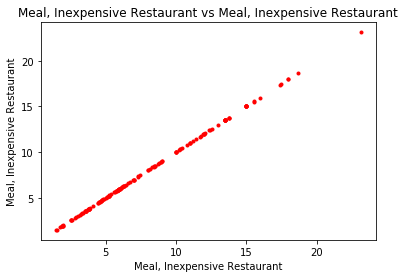

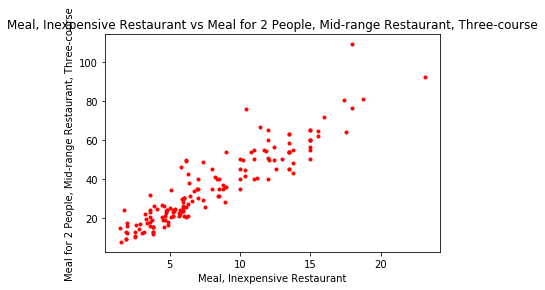

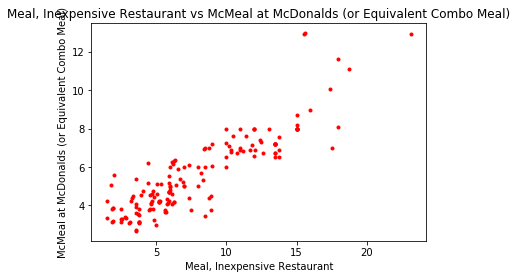

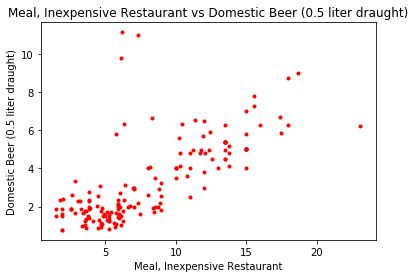

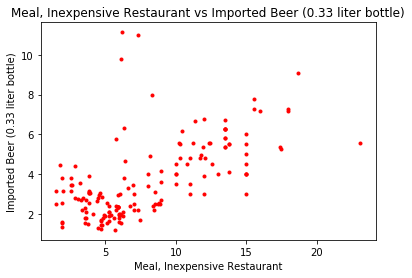

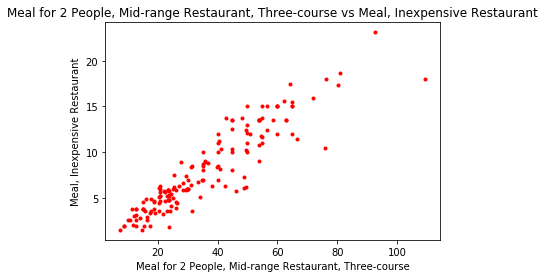

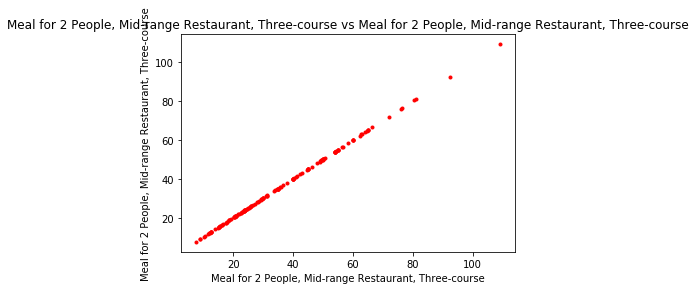

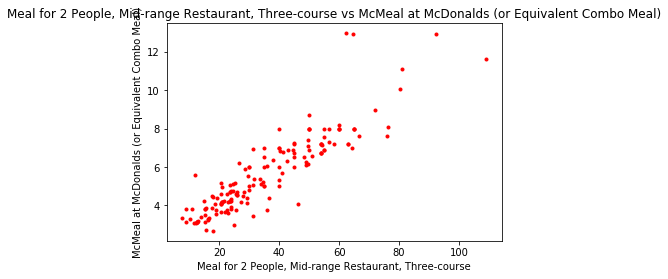

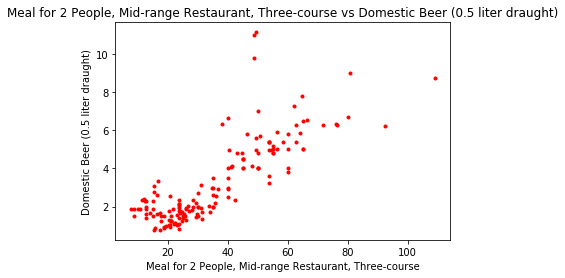

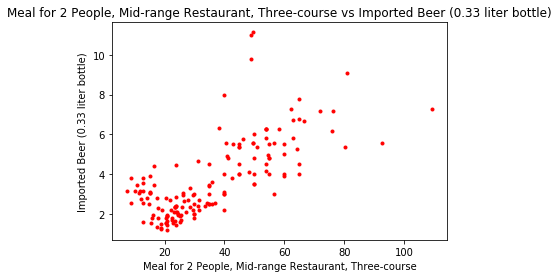

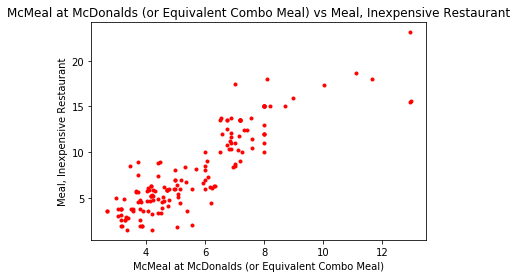

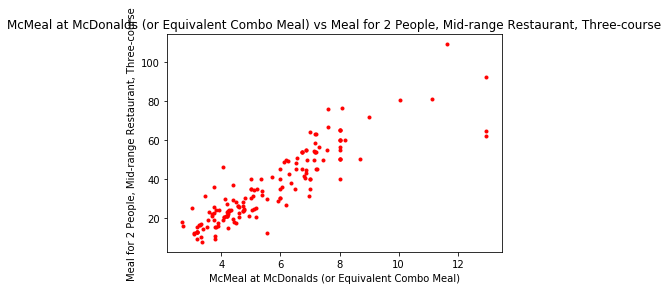

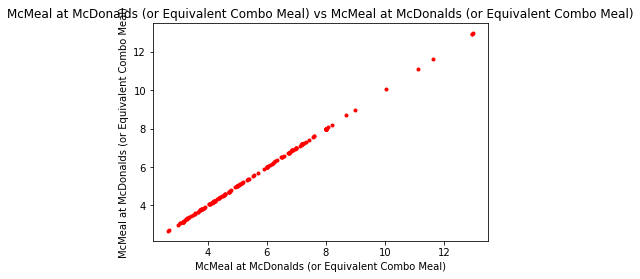

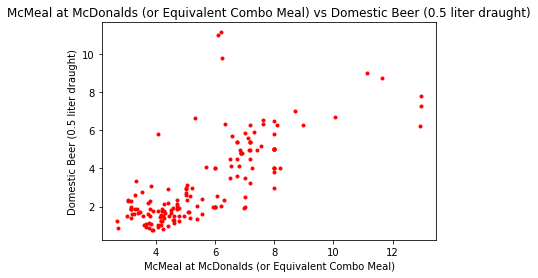

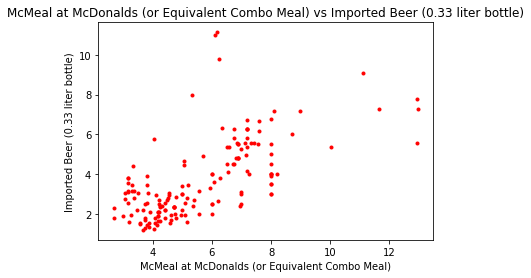

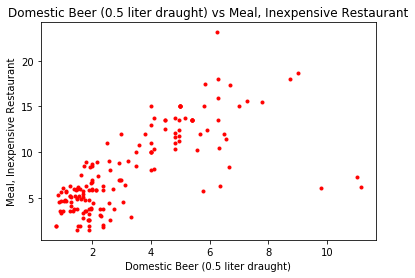

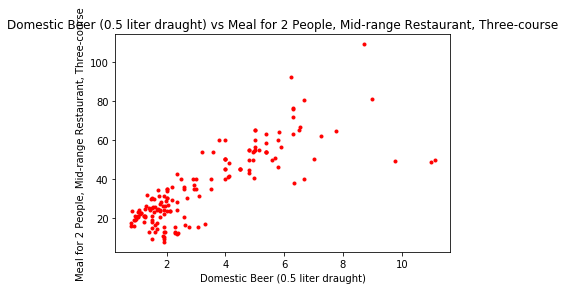

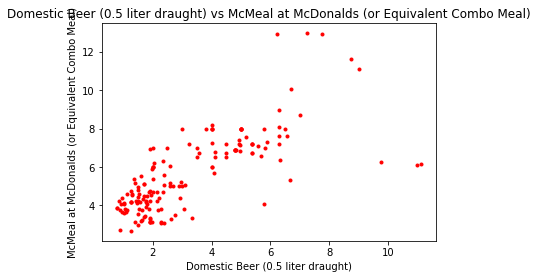

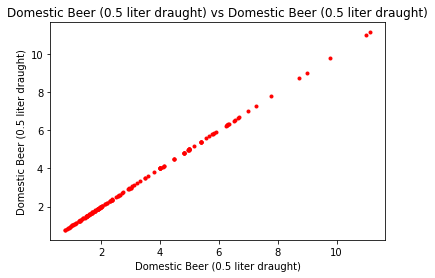

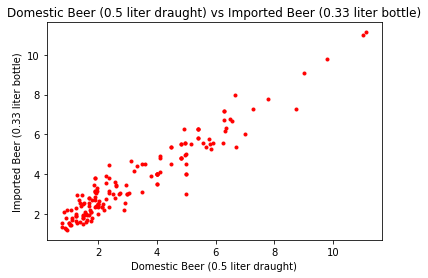

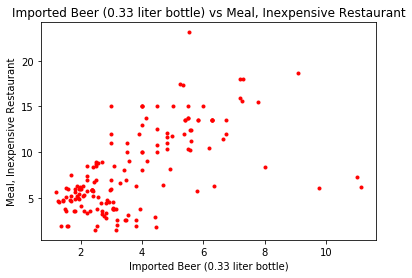

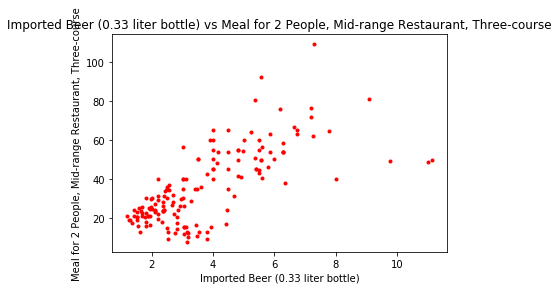

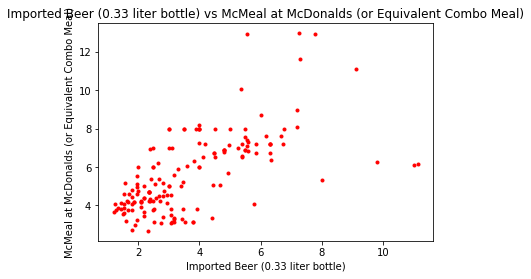

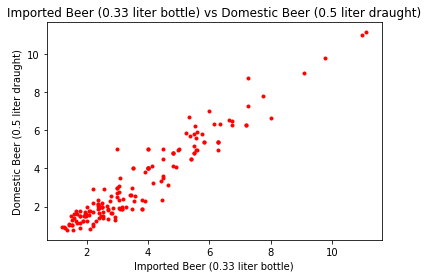

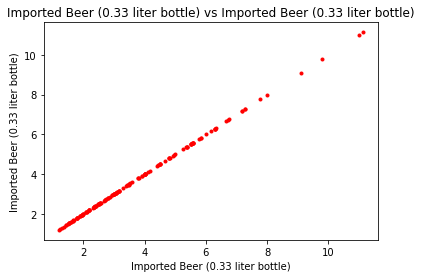

In [24]:
# plotting each feature against each other

# testing only the first 5 features
for i in range(5):
    for j in range(5):
        plt.title(feature_data.columns[i] + " vs " + feature_data.columns[j])
        plt.xlabel(feature_data.columns[i])
        plt.ylabel(feature_data.columns[j])
        plt.plot(feature_data.iloc[:, i], feature_data.iloc[:, j], 'r.')
        plt.show()

The above results compare plots between two features. These plots indicate the variability between each pair of features taht are tested

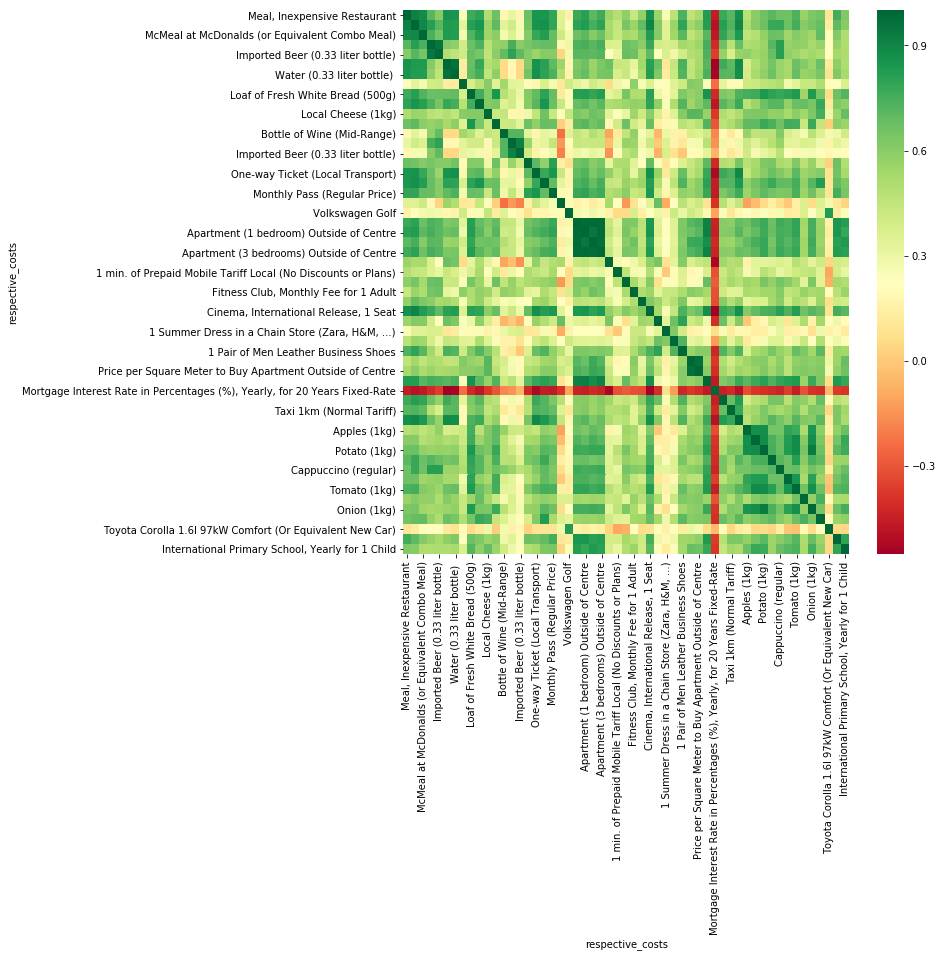

In [26]:
plt.figure(figsize=(10, 10))      # Sample figsize in inches
sns.heatmap(feature_float.corr(), cmap="RdYlGn")

The above heat map indicates how much each feature relates with each other. Features close to each other are more green and features away from each other are more red in colors.